In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-prediction/student_performance_dataset.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/kaggle/input/student-performance-prediction/student_performance_dataset.csv')

data.columns = data.columns.str.strip()

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Parental_Education_Level'] = le.fit_transform(data['Parental_Education_Level'])
data['Internet_Access_at_Home'] = le.fit_transform(data['Internet_Access_at_Home'])
data['Extracurricular_Activities'] = le.fit_transform(data['Extracurricular_Activities'])
data['Pass_Fail'] = le.fit_transform(data['Pass_Fail'])

data.fillna(0, inplace=True)


In [4]:
X = data[
    [
        'Gender',
        'Attendance_Rate',
        'Study_Hours_per_Week',
        'Parental_Education_Level',
        'Internet_Access_at_Home',
        'Extracurricular_Activities'
    ]
]
y = data['Pass_Fail']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
accuracies = {}

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
accuracies["KNN"] = acc_knn

print("=== KNN ===")
print("Accuracy:", acc_knn)
print(classification_report(y_test, y_pred_knn))


=== KNN ===
Accuracy: 0.8169014084507042
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        37
           1       0.77      0.88      0.82        34

    accuracy                           0.82        71
   macro avg       0.82      0.82      0.82        71
weighted avg       0.82      0.82      0.82        71



In [7]:
log_reg = LogisticRegression(C=0.5, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)
acc_log = accuracy_score(y_test, y_pred_log)
accuracies["Logistic Regression"] = acc_log

print("\n=== Logistic Regression ===")
print("Accuracy:", acc_log)
print(classification_report(y_test, y_pred_log))



=== Logistic Regression ===
Accuracy: 0.8732394366197183
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        37
           1       0.84      0.91      0.87        34

    accuracy                           0.87        71
   macro avg       0.87      0.87      0.87        71
weighted avg       0.88      0.87      0.87        71



In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_lin_class = [1 if pred >= 0.5 else 0 for pred in y_pred_lin]
acc_lin = accuracy_score(y_test, y_pred_lin_class)
accuracies["Linear Regression"] = acc_lin

print("\n=== Linear Regression (as classifier) ===")
print("Accuracy:", acc_lin)
print(classification_report(y_test, y_pred_lin_class))




=== Linear Regression (as classifier) ===
Accuracy: 0.8732394366197183
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        37
           1       0.84      0.91      0.87        34

    accuracy                           0.87        71
   macro avg       0.87      0.87      0.87        71
weighted avg       0.88      0.87      0.87        71



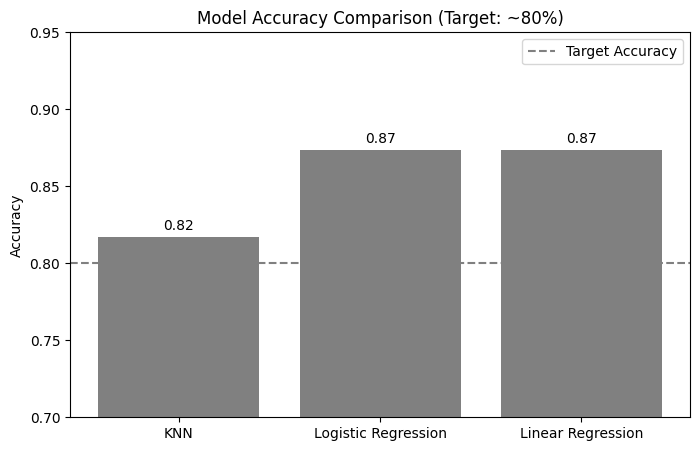

In [9]:
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['grey', 'grey', 'grey'])
plt.ylim(0.70, 0.95)  # إزالة \\ واستخدام الفاصلة , بدلًا منها
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Target: ~80%)')

for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')

plt.axhline(0.80, color='gray', linestyle='--', label='Target Accuracy')
plt.legend()
plt.show()


In [10]:
print("\n=== Preview of Dataset ===")
print(data.head())



=== Preview of Dataset ===
  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147       1                    31        68.267841                86   
1       S136       1                    16        78.222927                73   
2       S209       0                    21        87.525096                74   
3       S458       0                    27        92.076483                99   
4       S078       0                    37        98.655517                63   

   Parental_Education_Level  Internet_Access_at_Home  \
0                         1                        1   
1                         3                        0   
2                         3                        1   
3                         0                        0   
4                         2                        0   

   Extracurricular_Activities  Final_Exam_Score  Pass_Fail  
0                           1                63          1  
1                         